In [2]:
import pandas 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import lightgbm as lgb

In [4]:
train_path = '../input/train.csv'
train = pandas.read_csv(train_path)
test_path = '../input/test.csv'
test = pandas.read_csv(test_path)

In [5]:
y = train.target
train = train.drop('target',axis = 1)

In [6]:
ID_code = train.ID_code
train = train.drop('ID_code',axis=1)

In [7]:
ID_code = test.ID_code
test = test.drop('ID_code',axis=1)

In [18]:
features=['var_0', 'var_1', 'var_104', 'var_105', 'var_106', 'var_107',
       'var_108', 'var_109', 'var_110', 'var_111', 'var_114', 'var_115',
       'var_118', 'var_119', 'var_12', 'var_121', 'var_122', 'var_123',
       'var_125', 'var_127', 'var_128', 'var_13', 'var_130', 'var_131',
       'var_132', 'var_133', 'var_135', 'var_137', 'var_139', 'var_141',
       'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_151',
       'var_154', 'var_155', 'var_157', 'var_162', 'var_163', 'var_164',
       'var_165', 'var_166', 'var_167', 'var_168', 'var_169', 'var_170',
       'var_172', 'var_173', 'var_174', 'var_175', 'var_177', 'var_179',
       'var_18', 'var_180', 'var_184', 'var_186', 'var_188', 'var_190',
       'var_191', 'var_192', 'var_195', 'var_197', 'var_198', 'var_2',
       'var_21', 'var_22', 'var_24', 'var_26', 'var_28', 'var_32',
       'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43',
       'var_44', 'var_48', 'var_49', 'var_5', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_56', 'var_58', 'var_6', 'var_60',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_75', 'var_76',
       'var_78', 'var_80', 'var_81', 'var_83', 'var_86', 'var_87',
       'var_88', 'var_89', 'var_9', 'var_90', 'var_91', 'var_92',
       'var_93', 'var_94', 'var_95', 'var_99']

In [50]:
train = train[features]
test = test[features]

In [51]:
train.shape

(200000, 62)

In [6]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
mean = train.mean()
std = train.std()


In [9]:
train =  (train-mean)/std
test =  (test-mean)/std

In [105]:
train = train[abs(train) <3]

In [19]:
X_val = train[:10000]
y_val = y[:10000]
X = train[10000:]
Y = y[10000:]


In [30]:
param = {
    'num_leaves':31,
    'num_trees':2000,
    'objective':'binary',
    'metric':['auc','binary_logloss']
}


In [68]:
params={'boosting_type' : "gbdt", 
        'objective' : "binary",
        'metric' : "auc",  
        'learning_rate' : 0.05, 
        'max_depth' : 6,
        'num_leaves' : 20,
        'sub_feature' : 0.7, 
        'sub_row' : 0.7, 
        'bagging_freq' : 1,
        'lambda_l1' : 5, 
        'lambda_l2': 5
       }

In [21]:
train_data = lgb.Dataset(X,label=Y)
train_data.save_binary('train.bin')
validation_data = lgb.Dataset(X_val,label=y_val)
# validation_data = train_data.create_valid('validation.svm')

In [22]:
validation_data

In [69]:
num_round=5000

bst = lgb.train(params, train_data, num_round, valid_sets=[validation_data],early_stopping_rounds=50)
bst.save_model('model.txt')

[1]	valid_0's auc: 0.618423
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.641818
[3]	valid_0's auc: 0.652033
[4]	valid_0's auc: 0.660501
[5]	valid_0's auc: 0.674145
[6]	valid_0's auc: 0.677889
[7]	valid_0's auc: 0.685306
[8]	valid_0's auc: 0.689306
[9]	valid_0's auc: 0.695922
[10]	valid_0's auc: 0.709955
[11]	valid_0's auc: 0.713698
[12]	valid_0's auc: 0.721586
[13]	valid_0's auc: 0.727706
[14]	valid_0's auc: 0.73079
[15]	valid_0's auc: 0.735484
[16]	valid_0's auc: 0.741486
[17]	valid_0's auc: 0.742724
[18]	valid_0's auc: 0.743199
[19]	valid_0's auc: 0.745678
[20]	valid_0's auc: 0.748185
[21]	valid_0's auc: 0.750738
[22]	valid_0's auc: 0.754318
[23]	valid_0's auc: 0.759463
[24]	valid_0's auc: 0.761263
[25]	valid_0's auc: 0.763023
[26]	valid_0's auc: 0.763951
[27]	valid_0's auc: 0.76741
[28]	valid_0's auc: 0.768704
[29]	valid_0's auc: 0.770548
[30]	valid_0's auc: 0.773411
[31]	valid_0's auc: 0.775602
[32]	valid_0's auc: 0.777562
[33]	valid_0's auc: 0

[279]	valid_0's auc: 0.86488
[280]	valid_0's auc: 0.864897
[281]	valid_0's auc: 0.864925
[282]	valid_0's auc: 0.865057
[283]	valid_0's auc: 0.865218
[284]	valid_0's auc: 0.865268
[285]	valid_0's auc: 0.865369
[286]	valid_0's auc: 0.86531
[287]	valid_0's auc: 0.865461
[288]	valid_0's auc: 0.865578
[289]	valid_0's auc: 0.865766
[290]	valid_0's auc: 0.865983
[291]	valid_0's auc: 0.866172
[292]	valid_0's auc: 0.866299
[293]	valid_0's auc: 0.866373
[294]	valid_0's auc: 0.866537
[295]	valid_0's auc: 0.866604
[296]	valid_0's auc: 0.866658
[297]	valid_0's auc: 0.86695
[298]	valid_0's auc: 0.866772
[299]	valid_0's auc: 0.866845
[300]	valid_0's auc: 0.867094
[301]	valid_0's auc: 0.867184
[302]	valid_0's auc: 0.867273
[303]	valid_0's auc: 0.867465
[304]	valid_0's auc: 0.867507
[305]	valid_0's auc: 0.867621
[306]	valid_0's auc: 0.867708
[307]	valid_0's auc: 0.867648
[308]	valid_0's auc: 0.867724
[309]	valid_0's auc: 0.867864
[310]	valid_0's auc: 0.868172
[311]	valid_0's auc: 0.868358
[312]	valid_0

[557]	valid_0's auc: 0.880005
[558]	valid_0's auc: 0.880031
[559]	valid_0's auc: 0.880194
[560]	valid_0's auc: 0.880196
[561]	valid_0's auc: 0.88025
[562]	valid_0's auc: 0.880231
[563]	valid_0's auc: 0.880138
[564]	valid_0's auc: 0.880252
[565]	valid_0's auc: 0.880286
[566]	valid_0's auc: 0.880241
[567]	valid_0's auc: 0.880293
[568]	valid_0's auc: 0.880333
[569]	valid_0's auc: 0.88039
[570]	valid_0's auc: 0.880513
[571]	valid_0's auc: 0.880614
[572]	valid_0's auc: 0.880652
[573]	valid_0's auc: 0.880603
[574]	valid_0's auc: 0.880633
[575]	valid_0's auc: 0.88065
[576]	valid_0's auc: 0.880634
[577]	valid_0's auc: 0.880632
[578]	valid_0's auc: 0.880621
[579]	valid_0's auc: 0.880717
[580]	valid_0's auc: 0.880814
[581]	valid_0's auc: 0.880782
[582]	valid_0's auc: 0.880814
[583]	valid_0's auc: 0.880827
[584]	valid_0's auc: 0.880906
[585]	valid_0's auc: 0.880947
[586]	valid_0's auc: 0.88097
[587]	valid_0's auc: 0.880958
[588]	valid_0's auc: 0.880999
[589]	valid_0's auc: 0.881028
[590]	valid_0'

[833]	valid_0's auc: 0.885716
[834]	valid_0's auc: 0.885705
[835]	valid_0's auc: 0.88574
[836]	valid_0's auc: 0.885757
[837]	valid_0's auc: 0.885817
[838]	valid_0's auc: 0.885872
[839]	valid_0's auc: 0.885854
[840]	valid_0's auc: 0.88591
[841]	valid_0's auc: 0.885913
[842]	valid_0's auc: 0.885974
[843]	valid_0's auc: 0.885973
[844]	valid_0's auc: 0.886035
[845]	valid_0's auc: 0.886034
[846]	valid_0's auc: 0.886097
[847]	valid_0's auc: 0.88607
[848]	valid_0's auc: 0.886083
[849]	valid_0's auc: 0.886147
[850]	valid_0's auc: 0.886174
[851]	valid_0's auc: 0.886202
[852]	valid_0's auc: 0.886192
[853]	valid_0's auc: 0.886173
[854]	valid_0's auc: 0.886216
[855]	valid_0's auc: 0.886202
[856]	valid_0's auc: 0.886223
[857]	valid_0's auc: 0.886285
[858]	valid_0's auc: 0.886319
[859]	valid_0's auc: 0.886338
[860]	valid_0's auc: 0.886347
[861]	valid_0's auc: 0.886346
[862]	valid_0's auc: 0.886373
[863]	valid_0's auc: 0.886413
[864]	valid_0's auc: 0.886437
[865]	valid_0's auc: 0.88648
[866]	valid_0'

[1104]	valid_0's auc: 0.888797
[1105]	valid_0's auc: 0.88881
[1106]	valid_0's auc: 0.88882
[1107]	valid_0's auc: 0.888799
[1108]	valid_0's auc: 0.888783
[1109]	valid_0's auc: 0.88879
[1110]	valid_0's auc: 0.888807
[1111]	valid_0's auc: 0.888813
[1112]	valid_0's auc: 0.888802
[1113]	valid_0's auc: 0.888817
[1114]	valid_0's auc: 0.888823
[1115]	valid_0's auc: 0.888841
[1116]	valid_0's auc: 0.888876
[1117]	valid_0's auc: 0.888852
[1118]	valid_0's auc: 0.888908
[1119]	valid_0's auc: 0.888934
[1120]	valid_0's auc: 0.888932
[1121]	valid_0's auc: 0.88894
[1122]	valid_0's auc: 0.888914
[1123]	valid_0's auc: 0.888904
[1124]	valid_0's auc: 0.888911
[1125]	valid_0's auc: 0.888942
[1126]	valid_0's auc: 0.888949
[1127]	valid_0's auc: 0.888988
[1128]	valid_0's auc: 0.888977
[1129]	valid_0's auc: 0.88898
[1130]	valid_0's auc: 0.889008
[1131]	valid_0's auc: 0.88901
[1132]	valid_0's auc: 0.88901
[1133]	valid_0's auc: 0.889041
[1134]	valid_0's auc: 0.889026
[1135]	valid_0's auc: 0.889045
[1136]	valid_0'

100%|██████████| 1000/1000 [00:02<00:00, 484.36it/s]

Probability threshold maximizing CV F1-score for each class:
[0.101] 0.7995352751641985


0.8808267102057158

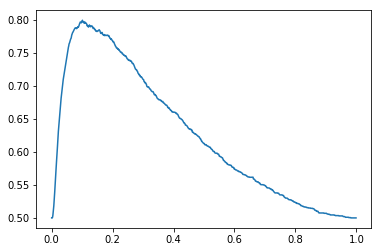

In [71]:
val_pred = bst.predict(X_val, num_iteration=model.best_iteration)
roc_auc_calc(val_pred)
roc_auc_score(y_val, val_pred)


In [39]:
for x in [5,6,7,8,9,10]:
    pass

In [38]:
models = np.array([])
roc_aucs = np.array([])

for leaves in np.arange(6, 15):
    param = {
        'num_leaves':leaves,
        'num_trees':1000,
        'objective':'binary',
        'num_boost_round':1000,
        'metric':['auc','binary_logloss']
    }
    bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data],early_stopping_rounds=10)

    val_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
    score = roc_auc_score(y_val, val_pred)

    roc_aucs=np.append(roc_aucs,score)
    models=np.append(models,bst)
# # make the prediction using the resulting model
# preds_class = model.predict(test_data)
# preds_proba = model.predict_proba(test_data)
print("roc_aucs = ", roc_aucs)
model = models[np.where(roc_aucs == np.max(roc_aucs ))[0][0]]


/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321958	valid_0's auc: 0.607275
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.320572	valid_0's auc: 0.62627
[3]	valid_0's binary_logloss: 0.319341	valid_0's auc: 0.630222
[4]	valid_0's binary_logloss: 0.318065	valid_0's auc: 0.644119
[5]	valid_0's binary_logloss: 0.316657	valid_0's auc: 0.655092
[6]	valid_0's binary_logloss: 0.315492	valid_0's auc: 0.667411
[7]	valid_0's binary_logloss: 0.314097	valid_0's auc: 0.682848
[8]	valid_0's binary_logloss: 0.312869	valid_0's auc: 0.692164
[9]	valid_0's binary_logloss: 0.311448	valid_0's auc: 0.707776
[10]	valid_0's binary_logloss: 0.310346	valid_0's auc: 0.715947
[11]	valid_0's binary_logloss: 0.309535	valid_0's auc: 0.719928
[12]	valid_0's binary_logloss: 0.308552	valid_0's auc: 0.724848
[13]	valid_0's binary_logloss: 0.307382	valid_0's auc: 0.734725
[14]	valid_0's binary_logloss: 0.306311	valid_0's auc: 0.740611
[15]	valid_0's binary_logloss: 0.305599	valid_0's au

[129]	valid_0's binary_logloss: 0.257365	valid_0's auc: 0.843485
[130]	valid_0's binary_logloss: 0.257077	valid_0's auc: 0.844109
[131]	valid_0's binary_logloss: 0.256838	valid_0's auc: 0.844358
[132]	valid_0's binary_logloss: 0.256651	valid_0's auc: 0.844835
[133]	valid_0's binary_logloss: 0.256443	valid_0's auc: 0.84502
[134]	valid_0's binary_logloss: 0.256233	valid_0's auc: 0.845144
[135]	valid_0's binary_logloss: 0.255985	valid_0's auc: 0.845221
[136]	valid_0's binary_logloss: 0.255681	valid_0's auc: 0.84562
[137]	valid_0's binary_logloss: 0.255485	valid_0's auc: 0.845894
[138]	valid_0's binary_logloss: 0.255153	valid_0's auc: 0.84634
[139]	valid_0's binary_logloss: 0.255041	valid_0's auc: 0.846487
[140]	valid_0's binary_logloss: 0.254774	valid_0's auc: 0.846999
[141]	valid_0's binary_logloss: 0.254553	valid_0's auc: 0.847315
[142]	valid_0's binary_logloss: 0.254294	valid_0's auc: 0.847499
[143]	valid_0's binary_logloss: 0.254116	valid_0's auc: 0.847619
[144]	valid_0's binary_loglo

[257]	valid_0's binary_logloss: 0.237637	valid_0's auc: 0.864894
[258]	valid_0's binary_logloss: 0.2375	valid_0's auc: 0.864918
[259]	valid_0's binary_logloss: 0.237287	valid_0's auc: 0.865281
[260]	valid_0's binary_logloss: 0.237132	valid_0's auc: 0.865493
[261]	valid_0's binary_logloss: 0.237015	valid_0's auc: 0.865652
[262]	valid_0's binary_logloss: 0.236917	valid_0's auc: 0.865709
[263]	valid_0's binary_logloss: 0.236804	valid_0's auc: 0.865813
[264]	valid_0's binary_logloss: 0.236651	valid_0's auc: 0.865967
[265]	valid_0's binary_logloss: 0.236584	valid_0's auc: 0.865965
[266]	valid_0's binary_logloss: 0.236494	valid_0's auc: 0.86614
[267]	valid_0's binary_logloss: 0.236396	valid_0's auc: 0.86635
[268]	valid_0's binary_logloss: 0.236271	valid_0's auc: 0.866465
[269]	valid_0's binary_logloss: 0.236194	valid_0's auc: 0.866495
[270]	valid_0's binary_logloss: 0.236044	valid_0's auc: 0.866743
[271]	valid_0's binary_logloss: 0.235966	valid_0's auc: 0.866788
[272]	valid_0's binary_loglos

[385]	valid_0's binary_logloss: 0.226949	valid_0's auc: 0.874141
[386]	valid_0's binary_logloss: 0.226817	valid_0's auc: 0.874375
[387]	valid_0's binary_logloss: 0.226734	valid_0's auc: 0.874487
[388]	valid_0's binary_logloss: 0.226647	valid_0's auc: 0.874635
[389]	valid_0's binary_logloss: 0.22659	valid_0's auc: 0.874662
[390]	valid_0's binary_logloss: 0.226536	valid_0's auc: 0.874705
[391]	valid_0's binary_logloss: 0.226471	valid_0's auc: 0.874721
[392]	valid_0's binary_logloss: 0.22649	valid_0's auc: 0.874579
[393]	valid_0's binary_logloss: 0.226455	valid_0's auc: 0.874584
[394]	valid_0's binary_logloss: 0.226344	valid_0's auc: 0.874808
[395]	valid_0's binary_logloss: 0.226308	valid_0's auc: 0.874784
[396]	valid_0's binary_logloss: 0.226182	valid_0's auc: 0.874868
[397]	valid_0's binary_logloss: 0.226104	valid_0's auc: 0.874932
[398]	valid_0's binary_logloss: 0.226061	valid_0's auc: 0.874923
[399]	valid_0's binary_logloss: 0.225985	valid_0's auc: 0.874956
[400]	valid_0's binary_logl

[515]	valid_0's binary_logloss: 0.220091	valid_0's auc: 0.879874
[516]	valid_0's binary_logloss: 0.220079	valid_0's auc: 0.879847
[517]	valid_0's binary_logloss: 0.220097	valid_0's auc: 0.87973
[518]	valid_0's binary_logloss: 0.220012	valid_0's auc: 0.879857
[519]	valid_0's binary_logloss: 0.220027	valid_0's auc: 0.879824
[520]	valid_0's binary_logloss: 0.219979	valid_0's auc: 0.879903
[521]	valid_0's binary_logloss: 0.219925	valid_0's auc: 0.879965
[522]	valid_0's binary_logloss: 0.219911	valid_0's auc: 0.879918
[523]	valid_0's binary_logloss: 0.219907	valid_0's auc: 0.879846
[524]	valid_0's binary_logloss: 0.219826	valid_0's auc: 0.879968
[525]	valid_0's binary_logloss: 0.219804	valid_0's auc: 0.880004
[526]	valid_0's binary_logloss: 0.219771	valid_0's auc: 0.879989
[527]	valid_0's binary_logloss: 0.219739	valid_0's auc: 0.880043
[528]	valid_0's binary_logloss: 0.219717	valid_0's auc: 0.880046
[529]	valid_0's binary_logloss: 0.219644	valid_0's auc: 0.880196
[530]	valid_0's binary_log

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321684	valid_0's auc: 0.608164
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.320192	valid_0's auc: 0.628061
[3]	valid_0's binary_logloss: 0.318693	valid_0's auc: 0.636693
[4]	valid_0's binary_logloss: 0.317251	valid_0's auc: 0.651453
[5]	valid_0's binary_logloss: 0.315818	valid_0's auc: 0.66618
[6]	valid_0's binary_logloss: 0.314017	valid_0's auc: 0.686881
[7]	valid_0's binary_logloss: 0.312561	valid_0's auc: 0.697172
[8]	valid_0's binary_logloss: 0.311423	valid_0's auc: 0.705871
[9]	valid_0's binary_logloss: 0.310005	valid_0's auc: 0.718617
[10]	valid_0's binary_logloss: 0.308599	valid_0's auc: 0.727527
[11]	valid_0's binary_logloss: 0.307312	valid_0's auc: 0.738698
[12]	valid_0's binary_logloss: 0.306386	valid_0's auc: 0.74114
[13]	valid_0's binary_logloss: 0.305227	valid_0's auc: 0.746839
[14]	valid_0's binary_logloss: 0.304311	valid_0's auc: 0.747727
[15]	valid_0's binary_logloss: 0.303355	valid_0's auc

[130]	valid_0's binary_logloss: 0.253645	valid_0's auc: 0.849035
[131]	valid_0's binary_logloss: 0.253449	valid_0's auc: 0.849171
[132]	valid_0's binary_logloss: 0.253111	valid_0's auc: 0.849599
[133]	valid_0's binary_logloss: 0.252912	valid_0's auc: 0.84978
[134]	valid_0's binary_logloss: 0.252615	valid_0's auc: 0.850093
[135]	valid_0's binary_logloss: 0.252377	valid_0's auc: 0.850584
[136]	valid_0's binary_logloss: 0.252209	valid_0's auc: 0.850866
[137]	valid_0's binary_logloss: 0.251927	valid_0's auc: 0.850991
[138]	valid_0's binary_logloss: 0.251805	valid_0's auc: 0.850854
[139]	valid_0's binary_logloss: 0.251666	valid_0's auc: 0.850778
[140]	valid_0's binary_logloss: 0.251561	valid_0's auc: 0.850521
[141]	valid_0's binary_logloss: 0.251446	valid_0's auc: 0.850654
[142]	valid_0's binary_logloss: 0.251305	valid_0's auc: 0.850701
[143]	valid_0's binary_logloss: 0.250994	valid_0's auc: 0.851135
[144]	valid_0's binary_logloss: 0.250866	valid_0's auc: 0.851197
[145]	valid_0's binary_log

[258]	valid_0's binary_logloss: 0.234391	valid_0's auc: 0.868275
[259]	valid_0's binary_logloss: 0.234268	valid_0's auc: 0.868411
[260]	valid_0's binary_logloss: 0.23418	valid_0's auc: 0.868457
[261]	valid_0's binary_logloss: 0.234055	valid_0's auc: 0.868522
[262]	valid_0's binary_logloss: 0.233903	valid_0's auc: 0.868735
[263]	valid_0's binary_logloss: 0.233862	valid_0's auc: 0.868748
[264]	valid_0's binary_logloss: 0.233744	valid_0's auc: 0.868868
[265]	valid_0's binary_logloss: 0.233626	valid_0's auc: 0.869117
[266]	valid_0's binary_logloss: 0.233566	valid_0's auc: 0.869126
[267]	valid_0's binary_logloss: 0.233419	valid_0's auc: 0.86933
[268]	valid_0's binary_logloss: 0.23334	valid_0's auc: 0.869449
[269]	valid_0's binary_logloss: 0.233275	valid_0's auc: 0.869348
[270]	valid_0's binary_logloss: 0.233239	valid_0's auc: 0.869404
[271]	valid_0's binary_logloss: 0.233137	valid_0's auc: 0.869491
[272]	valid_0's binary_logloss: 0.23308	valid_0's auc: 0.869551
[273]	valid_0's binary_loglos

[385]	valid_0's binary_logloss: 0.224701	valid_0's auc: 0.875398
[386]	valid_0's binary_logloss: 0.224677	valid_0's auc: 0.87535
[387]	valid_0's binary_logloss: 0.224685	valid_0's auc: 0.875241
[388]	valid_0's binary_logloss: 0.224626	valid_0's auc: 0.875227
[389]	valid_0's binary_logloss: 0.224544	valid_0's auc: 0.875346
[390]	valid_0's binary_logloss: 0.224425	valid_0's auc: 0.875528
[391]	valid_0's binary_logloss: 0.224454	valid_0's auc: 0.875457
[392]	valid_0's binary_logloss: 0.224377	valid_0's auc: 0.875547
[393]	valid_0's binary_logloss: 0.224324	valid_0's auc: 0.875603
[394]	valid_0's binary_logloss: 0.22429	valid_0's auc: 0.875479
[395]	valid_0's binary_logloss: 0.224285	valid_0's auc: 0.875394
[396]	valid_0's binary_logloss: 0.224267	valid_0's auc: 0.875374
[397]	valid_0's binary_logloss: 0.224208	valid_0's auc: 0.875412
[398]	valid_0's binary_logloss: 0.224154	valid_0's auc: 0.875493
[399]	valid_0's binary_logloss: 0.224029	valid_0's auc: 0.875714
[400]	valid_0's binary_logl

[514]	valid_0's binary_logloss: 0.218352	valid_0's auc: 0.880714
[515]	valid_0's binary_logloss: 0.218283	valid_0's auc: 0.880798
[516]	valid_0's binary_logloss: 0.218241	valid_0's auc: 0.880829
[517]	valid_0's binary_logloss: 0.218214	valid_0's auc: 0.880827
[518]	valid_0's binary_logloss: 0.218162	valid_0's auc: 0.880885
[519]	valid_0's binary_logloss: 0.218136	valid_0's auc: 0.880919
[520]	valid_0's binary_logloss: 0.218093	valid_0's auc: 0.880972
[521]	valid_0's binary_logloss: 0.218063	valid_0's auc: 0.88103
[522]	valid_0's binary_logloss: 0.218022	valid_0's auc: 0.88103
[523]	valid_0's binary_logloss: 0.218015	valid_0's auc: 0.880997
[524]	valid_0's binary_logloss: 0.217901	valid_0's auc: 0.881153
[525]	valid_0's binary_logloss: 0.217846	valid_0's auc: 0.881227
[526]	valid_0's binary_logloss: 0.217791	valid_0's auc: 0.88128
[527]	valid_0's binary_logloss: 0.217779	valid_0's auc: 0.881242
[528]	valid_0's binary_logloss: 0.217746	valid_0's auc: 0.881292
[529]	valid_0's binary_loglo

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321627	valid_0's auc: 0.607807
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.319994	valid_0's auc: 0.628226
[3]	valid_0's binary_logloss: 0.318359	valid_0's auc: 0.644223
[4]	valid_0's binary_logloss: 0.317042	valid_0's auc: 0.654949
[5]	valid_0's binary_logloss: 0.315152	valid_0's auc: 0.677955
[6]	valid_0's binary_logloss: 0.313885	valid_0's auc: 0.685314
[7]	valid_0's binary_logloss: 0.312367	valid_0's auc: 0.698547
[8]	valid_0's binary_logloss: 0.311083	valid_0's auc: 0.707147
[9]	valid_0's binary_logloss: 0.309434	valid_0's auc: 0.72436
[10]	valid_0's binary_logloss: 0.308005	valid_0's auc: 0.732822
[11]	valid_0's binary_logloss: 0.306702	valid_0's auc: 0.739405
[12]	valid_0's binary_logloss: 0.305883	valid_0's auc: 0.743008
[13]	valid_0's binary_logloss: 0.304699	valid_0's auc: 0.749406
[14]	valid_0's binary_logloss: 0.303917	valid_0's auc: 0.748929
[15]	valid_0's binary_logloss: 0.302817	valid_0's au

[131]	valid_0's binary_logloss: 0.251115	valid_0's auc: 0.849603
[132]	valid_0's binary_logloss: 0.250983	valid_0's auc: 0.849566
[133]	valid_0's binary_logloss: 0.250722	valid_0's auc: 0.850102
[134]	valid_0's binary_logloss: 0.25048	valid_0's auc: 0.850365
[135]	valid_0's binary_logloss: 0.250223	valid_0's auc: 0.850628
[136]	valid_0's binary_logloss: 0.250002	valid_0's auc: 0.850758
[137]	valid_0's binary_logloss: 0.249701	valid_0's auc: 0.851326
[138]	valid_0's binary_logloss: 0.249417	valid_0's auc: 0.851707
[139]	valid_0's binary_logloss: 0.249303	valid_0's auc: 0.851524
[140]	valid_0's binary_logloss: 0.249046	valid_0's auc: 0.852015
[141]	valid_0's binary_logloss: 0.248675	valid_0's auc: 0.852471
[142]	valid_0's binary_logloss: 0.248491	valid_0's auc: 0.852693
[143]	valid_0's binary_logloss: 0.248299	valid_0's auc: 0.85279
[144]	valid_0's binary_logloss: 0.248135	valid_0's auc: 0.853027
[145]	valid_0's binary_logloss: 0.247981	valid_0's auc: 0.853096
[146]	valid_0's binary_logl

[260]	valid_0's binary_logloss: 0.232538	valid_0's auc: 0.867926
[261]	valid_0's binary_logloss: 0.232453	valid_0's auc: 0.867986
[262]	valid_0's binary_logloss: 0.232351	valid_0's auc: 0.868131
[263]	valid_0's binary_logloss: 0.23225	valid_0's auc: 0.868136
[264]	valid_0's binary_logloss: 0.232168	valid_0's auc: 0.86816
[265]	valid_0's binary_logloss: 0.232114	valid_0's auc: 0.868137
[266]	valid_0's binary_logloss: 0.232045	valid_0's auc: 0.867994
[267]	valid_0's binary_logloss: 0.231899	valid_0's auc: 0.868244
[268]	valid_0's binary_logloss: 0.231833	valid_0's auc: 0.868248
[269]	valid_0's binary_logloss: 0.231683	valid_0's auc: 0.868517
[270]	valid_0's binary_logloss: 0.231721	valid_0's auc: 0.868302
[271]	valid_0's binary_logloss: 0.231633	valid_0's auc: 0.868354
[272]	valid_0's binary_logloss: 0.231539	valid_0's auc: 0.868331
[273]	valid_0's binary_logloss: 0.231424	valid_0's auc: 0.868538
[274]	valid_0's binary_logloss: 0.231383	valid_0's auc: 0.868416
[275]	valid_0's binary_logl

[390]	valid_0's binary_logloss: 0.222786	valid_0's auc: 0.875838
[391]	valid_0's binary_logloss: 0.22277	valid_0's auc: 0.875882
[392]	valid_0's binary_logloss: 0.222772	valid_0's auc: 0.875832
[393]	valid_0's binary_logloss: 0.222685	valid_0's auc: 0.875963
[394]	valid_0's binary_logloss: 0.222696	valid_0's auc: 0.875857
[395]	valid_0's binary_logloss: 0.222582	valid_0's auc: 0.875985
[396]	valid_0's binary_logloss: 0.222588	valid_0's auc: 0.875928
[397]	valid_0's binary_logloss: 0.222526	valid_0's auc: 0.875983
[398]	valid_0's binary_logloss: 0.222484	valid_0's auc: 0.876037
[399]	valid_0's binary_logloss: 0.222385	valid_0's auc: 0.876114
[400]	valid_0's binary_logloss: 0.222288	valid_0's auc: 0.876234
[401]	valid_0's binary_logloss: 0.222257	valid_0's auc: 0.876281
[402]	valid_0's binary_logloss: 0.222229	valid_0's auc: 0.876322
[403]	valid_0's binary_logloss: 0.222195	valid_0's auc: 0.876342
[404]	valid_0's binary_logloss: 0.222158	valid_0's auc: 0.876346
[405]	valid_0's binary_log

[518]	valid_0's binary_logloss: 0.216805	valid_0's auc: 0.880884
[519]	valid_0's binary_logloss: 0.216744	valid_0's auc: 0.880998
[520]	valid_0's binary_logloss: 0.2167	valid_0's auc: 0.881018
[521]	valid_0's binary_logloss: 0.216619	valid_0's auc: 0.881121
[522]	valid_0's binary_logloss: 0.21659	valid_0's auc: 0.881153
[523]	valid_0's binary_logloss: 0.216496	valid_0's auc: 0.881304
[524]	valid_0's binary_logloss: 0.216461	valid_0's auc: 0.881319
[525]	valid_0's binary_logloss: 0.216389	valid_0's auc: 0.881447
[526]	valid_0's binary_logloss: 0.216305	valid_0's auc: 0.88152
[527]	valid_0's binary_logloss: 0.216267	valid_0's auc: 0.881588
[528]	valid_0's binary_logloss: 0.216255	valid_0's auc: 0.881562
[529]	valid_0's binary_logloss: 0.216259	valid_0's auc: 0.881522
[530]	valid_0's binary_logloss: 0.21624	valid_0's auc: 0.881532
[531]	valid_0's binary_logloss: 0.216228	valid_0's auc: 0.881529
[532]	valid_0's binary_logloss: 0.216144	valid_0's auc: 0.88163
[533]	valid_0's binary_logloss:

[647]	valid_0's binary_logloss: 0.213249	valid_0's auc: 0.883885
[648]	valid_0's binary_logloss: 0.213229	valid_0's auc: 0.883905
[649]	valid_0's binary_logloss: 0.21322	valid_0's auc: 0.883893
[650]	valid_0's binary_logloss: 0.213224	valid_0's auc: 0.883838
[651]	valid_0's binary_logloss: 0.213206	valid_0's auc: 0.883863
[652]	valid_0's binary_logloss: 0.213233	valid_0's auc: 0.883857
[653]	valid_0's binary_logloss: 0.213212	valid_0's auc: 0.883924
[654]	valid_0's binary_logloss: 0.213216	valid_0's auc: 0.883893
[655]	valid_0's binary_logloss: 0.213184	valid_0's auc: 0.883894
[656]	valid_0's binary_logloss: 0.213184	valid_0's auc: 0.883899
[657]	valid_0's binary_logloss: 0.213191	valid_0's auc: 0.883893
[658]	valid_0's binary_logloss: 0.213177	valid_0's auc: 0.883903
[659]	valid_0's binary_logloss: 0.213133	valid_0's auc: 0.883969
[660]	valid_0's binary_logloss: 0.213096	valid_0's auc: 0.884007
[661]	valid_0's binary_logloss: 0.213074	valid_0's auc: 0.884036
[662]	valid_0's binary_log

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321459	valid_0's auc: 0.617239
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.319606	valid_0's auc: 0.645425
[3]	valid_0's binary_logloss: 0.317899	valid_0's auc: 0.653309
[4]	valid_0's binary_logloss: 0.316534	valid_0's auc: 0.662588
[5]	valid_0's binary_logloss: 0.314637	valid_0's auc: 0.683154
[6]	valid_0's binary_logloss: 0.31286	valid_0's auc: 0.697236
[7]	valid_0's binary_logloss: 0.311098	valid_0's auc: 0.712274
[8]	valid_0's binary_logloss: 0.309897	valid_0's auc: 0.719715
[9]	valid_0's binary_logloss: 0.308383	valid_0's auc: 0.726289
[10]	valid_0's binary_logloss: 0.307391	valid_0's auc: 0.728856
[11]	valid_0's binary_logloss: 0.305913	valid_0's auc: 0.738083
[12]	valid_0's binary_logloss: 0.304682	valid_0's auc: 0.74544
[13]	valid_0's binary_logloss: 0.303616	valid_0's auc: 0.750287
[14]	valid_0's binary_logloss: 0.302626	valid_0's auc: 0.754593
[15]	valid_0's binary_logloss: 0.301098	valid_0's auc

[131]	valid_0's binary_logloss: 0.249255	valid_0's auc: 0.853703
[132]	valid_0's binary_logloss: 0.249161	valid_0's auc: 0.853495
[133]	valid_0's binary_logloss: 0.248914	valid_0's auc: 0.853772
[134]	valid_0's binary_logloss: 0.248632	valid_0's auc: 0.854053
[135]	valid_0's binary_logloss: 0.248408	valid_0's auc: 0.854318
[136]	valid_0's binary_logloss: 0.248147	valid_0's auc: 0.854623
[137]	valid_0's binary_logloss: 0.247876	valid_0's auc: 0.855013
[138]	valid_0's binary_logloss: 0.247678	valid_0's auc: 0.855268
[139]	valid_0's binary_logloss: 0.247424	valid_0's auc: 0.855466
[140]	valid_0's binary_logloss: 0.247167	valid_0's auc: 0.855846
[141]	valid_0's binary_logloss: 0.246948	valid_0's auc: 0.855965
[142]	valid_0's binary_logloss: 0.246783	valid_0's auc: 0.85633
[143]	valid_0's binary_logloss: 0.24666	valid_0's auc: 0.856236
[144]	valid_0's binary_logloss: 0.246432	valid_0's auc: 0.856553
[145]	valid_0's binary_logloss: 0.246267	valid_0's auc: 0.856707
[146]	valid_0's binary_logl

[258]	valid_0's binary_logloss: 0.230904	valid_0's auc: 0.870959
[259]	valid_0's binary_logloss: 0.230785	valid_0's auc: 0.871014
[260]	valid_0's binary_logloss: 0.230703	valid_0's auc: 0.870997
[261]	valid_0's binary_logloss: 0.230627	valid_0's auc: 0.870999
[262]	valid_0's binary_logloss: 0.230459	valid_0's auc: 0.871155
[263]	valid_0's binary_logloss: 0.230434	valid_0's auc: 0.870999
[264]	valid_0's binary_logloss: 0.230304	valid_0's auc: 0.871255
[265]	valid_0's binary_logloss: 0.230201	valid_0's auc: 0.871394
[266]	valid_0's binary_logloss: 0.230084	valid_0's auc: 0.871452
[267]	valid_0's binary_logloss: 0.229969	valid_0's auc: 0.871563
[268]	valid_0's binary_logloss: 0.229915	valid_0's auc: 0.87158
[269]	valid_0's binary_logloss: 0.229816	valid_0's auc: 0.871663
[270]	valid_0's binary_logloss: 0.229766	valid_0's auc: 0.8717
[271]	valid_0's binary_logloss: 0.229686	valid_0's auc: 0.871737
[272]	valid_0's binary_logloss: 0.229556	valid_0's auc: 0.871981
[273]	valid_0's binary_loglo

[386]	valid_0's binary_logloss: 0.220989	valid_0's auc: 0.879124
[387]	valid_0's binary_logloss: 0.220958	valid_0's auc: 0.879143
[388]	valid_0's binary_logloss: 0.220904	valid_0's auc: 0.879177
[389]	valid_0's binary_logloss: 0.220839	valid_0's auc: 0.87925
[390]	valid_0's binary_logloss: 0.220778	valid_0's auc: 0.879295
[391]	valid_0's binary_logloss: 0.220747	valid_0's auc: 0.879261
[392]	valid_0's binary_logloss: 0.220655	valid_0's auc: 0.879385
[393]	valid_0's binary_logloss: 0.220662	valid_0's auc: 0.879314
[394]	valid_0's binary_logloss: 0.220604	valid_0's auc: 0.879322
[395]	valid_0's binary_logloss: 0.220526	valid_0's auc: 0.879427
[396]	valid_0's binary_logloss: 0.220503	valid_0's auc: 0.87943
[397]	valid_0's binary_logloss: 0.220455	valid_0's auc: 0.879458
[398]	valid_0's binary_logloss: 0.220393	valid_0's auc: 0.879507
[399]	valid_0's binary_logloss: 0.220289	valid_0's auc: 0.879636
[400]	valid_0's binary_logloss: 0.220271	valid_0's auc: 0.879582
[401]	valid_0's binary_logl

[514]	valid_0's binary_logloss: 0.215611	valid_0's auc: 0.883147
[515]	valid_0's binary_logloss: 0.215565	valid_0's auc: 0.883161
[516]	valid_0's binary_logloss: 0.215486	valid_0's auc: 0.883254
[517]	valid_0's binary_logloss: 0.215465	valid_0's auc: 0.883273
[518]	valid_0's binary_logloss: 0.215445	valid_0's auc: 0.883281
[519]	valid_0's binary_logloss: 0.215398	valid_0's auc: 0.883384
[520]	valid_0's binary_logloss: 0.215413	valid_0's auc: 0.883378
[521]	valid_0's binary_logloss: 0.215368	valid_0's auc: 0.883385
[522]	valid_0's binary_logloss: 0.215304	valid_0's auc: 0.883516
[523]	valid_0's binary_logloss: 0.215292	valid_0's auc: 0.883549
[524]	valid_0's binary_logloss: 0.215243	valid_0's auc: 0.883591
[525]	valid_0's binary_logloss: 0.215252	valid_0's auc: 0.88353
[526]	valid_0's binary_logloss: 0.215221	valid_0's auc: 0.883549
[527]	valid_0's binary_logloss: 0.215195	valid_0's auc: 0.883594
[528]	valid_0's binary_logloss: 0.215142	valid_0's auc: 0.883713
[529]	valid_0's binary_log

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.32114	valid_0's auc: 0.619304
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.319238	valid_0's auc: 0.646855
[3]	valid_0's binary_logloss: 0.317577	valid_0's auc: 0.653873
[4]	valid_0's binary_logloss: 0.316214	valid_0's auc: 0.663683
[5]	valid_0's binary_logloss: 0.314115	valid_0's auc: 0.687462
[6]	valid_0's binary_logloss: 0.312373	valid_0's auc: 0.702923
[7]	valid_0's binary_logloss: 0.310695	valid_0's auc: 0.717883
[8]	valid_0's binary_logloss: 0.309322	valid_0's auc: 0.723489
[9]	valid_0's binary_logloss: 0.307671	valid_0's auc: 0.732897
[10]	valid_0's binary_logloss: 0.30665	valid_0's auc: 0.73628
[11]	valid_0's binary_logloss: 0.30535	valid_0's auc: 0.74
[12]	valid_0's binary_logloss: 0.30414	valid_0's auc: 0.744783
[13]	valid_0's binary_logloss: 0.30286	valid_0's auc: 0.752465
[14]	valid_0's binary_logloss: 0.30164	valid_0's auc: 0.756937
[15]	valid_0's binary_logloss: 0.300581	valid_0's auc: 0.76200

[131]	valid_0's binary_logloss: 0.248302	valid_0's auc: 0.851621
[132]	valid_0's binary_logloss: 0.248065	valid_0's auc: 0.85206
[133]	valid_0's binary_logloss: 0.247805	valid_0's auc: 0.852459
[134]	valid_0's binary_logloss: 0.247508	valid_0's auc: 0.853004
[135]	valid_0's binary_logloss: 0.247268	valid_0's auc: 0.853459
[136]	valid_0's binary_logloss: 0.247041	valid_0's auc: 0.853875
[137]	valid_0's binary_logloss: 0.246808	valid_0's auc: 0.854195
[138]	valid_0's binary_logloss: 0.246556	valid_0's auc: 0.854646
[139]	valid_0's binary_logloss: 0.246301	valid_0's auc: 0.85521
[140]	valid_0's binary_logloss: 0.246	valid_0's auc: 0.855868
[141]	valid_0's binary_logloss: 0.245791	valid_0's auc: 0.8561
[142]	valid_0's binary_logloss: 0.245502	valid_0's auc: 0.856413
[143]	valid_0's binary_logloss: 0.245246	valid_0's auc: 0.856689
[144]	valid_0's binary_logloss: 0.24503	valid_0's auc: 0.856931
[145]	valid_0's binary_logloss: 0.244783	valid_0's auc: 0.857162
[146]	valid_0's binary_logloss: 0

[260]	valid_0's binary_logloss: 0.229663	valid_0's auc: 0.871104
[261]	valid_0's binary_logloss: 0.229558	valid_0's auc: 0.871188
[262]	valid_0's binary_logloss: 0.229468	valid_0's auc: 0.87133
[263]	valid_0's binary_logloss: 0.229348	valid_0's auc: 0.871426
[264]	valid_0's binary_logloss: 0.229253	valid_0's auc: 0.871559
[265]	valid_0's binary_logloss: 0.229259	valid_0's auc: 0.871351
[266]	valid_0's binary_logloss: 0.229184	valid_0's auc: 0.871357
[267]	valid_0's binary_logloss: 0.22904	valid_0's auc: 0.87157
[268]	valid_0's binary_logloss: 0.228929	valid_0's auc: 0.871664
[269]	valid_0's binary_logloss: 0.228821	valid_0's auc: 0.871684
[270]	valid_0's binary_logloss: 0.228797	valid_0's auc: 0.871567
[271]	valid_0's binary_logloss: 0.228693	valid_0's auc: 0.871642
[272]	valid_0's binary_logloss: 0.228645	valid_0's auc: 0.871624
[273]	valid_0's binary_logloss: 0.228639	valid_0's auc: 0.871558
[274]	valid_0's binary_logloss: 0.228507	valid_0's auc: 0.871701
[275]	valid_0's binary_loglo

[387]	valid_0's binary_logloss: 0.220453	valid_0's auc: 0.879057
[388]	valid_0's binary_logloss: 0.220395	valid_0's auc: 0.879109
[389]	valid_0's binary_logloss: 0.22033	valid_0's auc: 0.879208
[390]	valid_0's binary_logloss: 0.220297	valid_0's auc: 0.879201
[391]	valid_0's binary_logloss: 0.220283	valid_0's auc: 0.87917
[392]	valid_0's binary_logloss: 0.220242	valid_0's auc: 0.879277
[393]	valid_0's binary_logloss: 0.220193	valid_0's auc: 0.879348
[394]	valid_0's binary_logloss: 0.220161	valid_0's auc: 0.879382
[395]	valid_0's binary_logloss: 0.220088	valid_0's auc: 0.879568
[396]	valid_0's binary_logloss: 0.220072	valid_0's auc: 0.879574
[397]	valid_0's binary_logloss: 0.219996	valid_0's auc: 0.879729
[398]	valid_0's binary_logloss: 0.219887	valid_0's auc: 0.879856
[399]	valid_0's binary_logloss: 0.21985	valid_0's auc: 0.879885
[400]	valid_0's binary_logloss: 0.219762	valid_0's auc: 0.880044
[401]	valid_0's binary_logloss: 0.219744	valid_0's auc: 0.880041
[402]	valid_0's binary_loglo

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321083	valid_0's auc: 0.622101
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.319033	valid_0's auc: 0.648214
[3]	valid_0's binary_logloss: 0.31734	valid_0's auc: 0.657974
[4]	valid_0's binary_logloss: 0.315735	valid_0's auc: 0.672013
[5]	valid_0's binary_logloss: 0.313716	valid_0's auc: 0.691215
[6]	valid_0's binary_logloss: 0.312108	valid_0's auc: 0.701561
[7]	valid_0's binary_logloss: 0.310576	valid_0's auc: 0.713401
[8]	valid_0's binary_logloss: 0.308858	valid_0's auc: 0.724276
[9]	valid_0's binary_logloss: 0.30742	valid_0's auc: 0.733525
[10]	valid_0's binary_logloss: 0.306014	valid_0's auc: 0.741283
[11]	valid_0's binary_logloss: 0.304748	valid_0's auc: 0.742967
[12]	valid_0's binary_logloss: 0.30341	valid_0's auc: 0.750374
[13]	valid_0's binary_logloss: 0.302145	valid_0's auc: 0.754899
[14]	valid_0's binary_logloss: 0.300714	valid_0's auc: 0.759771
[15]	valid_0's binary_logloss: 0.299772	valid_0's auc:

[129]	valid_0's binary_logloss: 0.245848	valid_0's auc: 0.857237
[130]	valid_0's binary_logloss: 0.2456	valid_0's auc: 0.857815
[131]	valid_0's binary_logloss: 0.245368	valid_0's auc: 0.857884
[132]	valid_0's binary_logloss: 0.245198	valid_0's auc: 0.858101
[133]	valid_0's binary_logloss: 0.244992	valid_0's auc: 0.858302
[134]	valid_0's binary_logloss: 0.24477	valid_0's auc: 0.858425
[135]	valid_0's binary_logloss: 0.244527	valid_0's auc: 0.858986
[136]	valid_0's binary_logloss: 0.244363	valid_0's auc: 0.859232
[137]	valid_0's binary_logloss: 0.24418	valid_0's auc: 0.859211
[138]	valid_0's binary_logloss: 0.244045	valid_0's auc: 0.859198
[139]	valid_0's binary_logloss: 0.243893	valid_0's auc: 0.85925
[140]	valid_0's binary_logloss: 0.243595	valid_0's auc: 0.859604
[141]	valid_0's binary_logloss: 0.243419	valid_0's auc: 0.85964
[142]	valid_0's binary_logloss: 0.243164	valid_0's auc: 0.859944
[143]	valid_0's binary_logloss: 0.243045	valid_0's auc: 0.859881
[144]	valid_0's binary_logloss:

[257]	valid_0's binary_logloss: 0.227662	valid_0's auc: 0.8728
[258]	valid_0's binary_logloss: 0.227528	valid_0's auc: 0.872903
[259]	valid_0's binary_logloss: 0.227401	valid_0's auc: 0.873027
[260]	valid_0's binary_logloss: 0.227314	valid_0's auc: 0.873128
[261]	valid_0's binary_logloss: 0.227325	valid_0's auc: 0.872959
[262]	valid_0's binary_logloss: 0.227224	valid_0's auc: 0.873155
[263]	valid_0's binary_logloss: 0.22713	valid_0's auc: 0.873247
[264]	valid_0's binary_logloss: 0.226997	valid_0's auc: 0.873442
[265]	valid_0's binary_logloss: 0.226914	valid_0's auc: 0.873634
[266]	valid_0's binary_logloss: 0.226846	valid_0's auc: 0.873607
[267]	valid_0's binary_logloss: 0.226745	valid_0's auc: 0.873725
[268]	valid_0's binary_logloss: 0.226649	valid_0's auc: 0.873787
[269]	valid_0's binary_logloss: 0.22664	valid_0's auc: 0.873682
[270]	valid_0's binary_logloss: 0.226545	valid_0's auc: 0.873802
[271]	valid_0's binary_logloss: 0.226484	valid_0's auc: 0.873761
[272]	valid_0's binary_loglos

[384]	valid_0's binary_logloss: 0.218573	valid_0's auc: 0.880578
[385]	valid_0's binary_logloss: 0.218498	valid_0's auc: 0.880665
[386]	valid_0's binary_logloss: 0.218433	valid_0's auc: 0.880632
[387]	valid_0's binary_logloss: 0.218353	valid_0's auc: 0.880818
[388]	valid_0's binary_logloss: 0.218317	valid_0's auc: 0.880888
[389]	valid_0's binary_logloss: 0.21829	valid_0's auc: 0.88092
[390]	valid_0's binary_logloss: 0.218238	valid_0's auc: 0.881005
[391]	valid_0's binary_logloss: 0.218162	valid_0's auc: 0.881107
[392]	valid_0's binary_logloss: 0.218113	valid_0's auc: 0.88115
[393]	valid_0's binary_logloss: 0.218039	valid_0's auc: 0.881171
[394]	valid_0's binary_logloss: 0.217927	valid_0's auc: 0.881312
[395]	valid_0's binary_logloss: 0.217863	valid_0's auc: 0.881353
[396]	valid_0's binary_logloss: 0.217801	valid_0's auc: 0.881443
[397]	valid_0's binary_logloss: 0.217759	valid_0's auc: 0.881467
[398]	valid_0's binary_logloss: 0.217657	valid_0's auc: 0.881588
[399]	valid_0's binary_loglo

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.321023	valid_0's auc: 0.622243
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.318981	valid_0's auc: 0.647737
[3]	valid_0's binary_logloss: 0.317174	valid_0's auc: 0.657603
[4]	valid_0's binary_logloss: 0.315445	valid_0's auc: 0.674133
[5]	valid_0's binary_logloss: 0.313443	valid_0's auc: 0.691738
[6]	valid_0's binary_logloss: 0.31173	valid_0's auc: 0.705803
[7]	valid_0's binary_logloss: 0.309914	valid_0's auc: 0.718396
[8]	valid_0's binary_logloss: 0.308362	valid_0's auc: 0.729662
[9]	valid_0's binary_logloss: 0.306701	valid_0's auc: 0.738983
[10]	valid_0's binary_logloss: 0.305435	valid_0's auc: 0.740808
[11]	valid_0's binary_logloss: 0.303897	valid_0's auc: 0.749043
[12]	valid_0's binary_logloss: 0.302234	valid_0's auc: 0.757131
[13]	valid_0's binary_logloss: 0.30101	valid_0's auc: 0.761816
[14]	valid_0's binary_logloss: 0.299973	valid_0's auc: 0.765755
[15]	valid_0's binary_logloss: 0.298556	valid_0's auc

[131]	valid_0's binary_logloss: 0.245793	valid_0's auc: 0.85418
[132]	valid_0's binary_logloss: 0.24566	valid_0's auc: 0.854056
[133]	valid_0's binary_logloss: 0.245402	valid_0's auc: 0.854591
[134]	valid_0's binary_logloss: 0.245248	valid_0's auc: 0.854778
[135]	valid_0's binary_logloss: 0.245005	valid_0's auc: 0.854916
[136]	valid_0's binary_logloss: 0.244786	valid_0's auc: 0.855239
[137]	valid_0's binary_logloss: 0.244507	valid_0's auc: 0.855783
[138]	valid_0's binary_logloss: 0.244312	valid_0's auc: 0.856004
[139]	valid_0's binary_logloss: 0.244055	valid_0's auc: 0.856289
[140]	valid_0's binary_logloss: 0.243799	valid_0's auc: 0.856451
[141]	valid_0's binary_logloss: 0.243675	valid_0's auc: 0.856604
[142]	valid_0's binary_logloss: 0.243539	valid_0's auc: 0.856571
[143]	valid_0's binary_logloss: 0.243347	valid_0's auc: 0.856734
[144]	valid_0's binary_logloss: 0.243247	valid_0's auc: 0.856655
[145]	valid_0's binary_logloss: 0.243042	valid_0's auc: 0.856988
[146]	valid_0's binary_logl

[259]	valid_0's binary_logloss: 0.227942	valid_0's auc: 0.870632
[260]	valid_0's binary_logloss: 0.227809	valid_0's auc: 0.870737
[261]	valid_0's binary_logloss: 0.227706	valid_0's auc: 0.870863
[262]	valid_0's binary_logloss: 0.227617	valid_0's auc: 0.870984
[263]	valid_0's binary_logloss: 0.227505	valid_0's auc: 0.871117
[264]	valid_0's binary_logloss: 0.22746	valid_0's auc: 0.871093
[265]	valid_0's binary_logloss: 0.22735	valid_0's auc: 0.871197
[266]	valid_0's binary_logloss: 0.227231	valid_0's auc: 0.871279
[267]	valid_0's binary_logloss: 0.227164	valid_0's auc: 0.871309
[268]	valid_0's binary_logloss: 0.227112	valid_0's auc: 0.871346
[269]	valid_0's binary_logloss: 0.227015	valid_0's auc: 0.87149
[270]	valid_0's binary_logloss: 0.226931	valid_0's auc: 0.87161
[271]	valid_0's binary_logloss: 0.226816	valid_0's auc: 0.871782
[272]	valid_0's binary_logloss: 0.226711	valid_0's auc: 0.871951
[273]	valid_0's binary_logloss: 0.226698	valid_0's auc: 0.871857
[274]	valid_0's binary_loglos

[386]	valid_0's binary_logloss: 0.218341	valid_0's auc: 0.880001
[387]	valid_0's binary_logloss: 0.218308	valid_0's auc: 0.88001
[388]	valid_0's binary_logloss: 0.218262	valid_0's auc: 0.879992
[389]	valid_0's binary_logloss: 0.218282	valid_0's auc: 0.879914
[390]	valid_0's binary_logloss: 0.218227	valid_0's auc: 0.880003
[391]	valid_0's binary_logloss: 0.218171	valid_0's auc: 0.88003
[392]	valid_0's binary_logloss: 0.218103	valid_0's auc: 0.880107
[393]	valid_0's binary_logloss: 0.218096	valid_0's auc: 0.880052
[394]	valid_0's binary_logloss: 0.218045	valid_0's auc: 0.880079
[395]	valid_0's binary_logloss: 0.217962	valid_0's auc: 0.880166
[396]	valid_0's binary_logloss: 0.217965	valid_0's auc: 0.880079
[397]	valid_0's binary_logloss: 0.217907	valid_0's auc: 0.880145
[398]	valid_0's binary_logloss: 0.217878	valid_0's auc: 0.880205
[399]	valid_0's binary_logloss: 0.217844	valid_0's auc: 0.880192
[400]	valid_0's binary_logloss: 0.217817	valid_0's auc: 0.880236
[401]	valid_0's binary_logl

[514]	valid_0's binary_logloss: 0.213923	valid_0's auc: 0.883896
[515]	valid_0's binary_logloss: 0.213903	valid_0's auc: 0.883911
[516]	valid_0's binary_logloss: 0.213918	valid_0's auc: 0.883882
[517]	valid_0's binary_logloss: 0.213893	valid_0's auc: 0.883884
[518]	valid_0's binary_logloss: 0.213846	valid_0's auc: 0.883955
[519]	valid_0's binary_logloss: 0.213835	valid_0's auc: 0.883954
[520]	valid_0's binary_logloss: 0.213795	valid_0's auc: 0.884016
[521]	valid_0's binary_logloss: 0.213848	valid_0's auc: 0.883947
[522]	valid_0's binary_logloss: 0.213838	valid_0's auc: 0.883973
[523]	valid_0's binary_logloss: 0.21385	valid_0's auc: 0.883914
[524]	valid_0's binary_logloss: 0.213809	valid_0's auc: 0.883942
[525]	valid_0's binary_logloss: 0.213775	valid_0's auc: 0.884
[526]	valid_0's binary_logloss: 0.213729	valid_0's auc: 0.884042
[527]	valid_0's binary_logloss: 0.213749	valid_0's auc: 0.88401
[528]	valid_0's binary_logloss: 0.213755	valid_0's auc: 0.883981
[529]	valid_0's binary_logloss

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.320925	valid_0's auc: 0.623272
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.318749	valid_0's auc: 0.653204
[3]	valid_0's binary_logloss: 0.316932	valid_0's auc: 0.661716
[4]	valid_0's binary_logloss: 0.315171	valid_0's auc: 0.679438
[5]	valid_0's binary_logloss: 0.313314	valid_0's auc: 0.692645
[6]	valid_0's binary_logloss: 0.311345	valid_0's auc: 0.708639
[7]	valid_0's binary_logloss: 0.309511	valid_0's auc: 0.718967
[8]	valid_0's binary_logloss: 0.308186	valid_0's auc: 0.728069
[9]	valid_0's binary_logloss: 0.306438	valid_0's auc: 0.735434
[10]	valid_0's binary_logloss: 0.305264	valid_0's auc: 0.740447
[11]	valid_0's binary_logloss: 0.304058	valid_0's auc: 0.742442
[12]	valid_0's binary_logloss: 0.302562	valid_0's auc: 0.748441
[13]	valid_0's binary_logloss: 0.300756	valid_0's auc: 0.757829
[14]	valid_0's binary_logloss: 0.299715	valid_0's auc: 0.758776
[15]	valid_0's binary_logloss: 0.29843	valid_0's au

[131]	valid_0's binary_logloss: 0.24416	valid_0's auc: 0.855971
[132]	valid_0's binary_logloss: 0.243989	valid_0's auc: 0.856275
[133]	valid_0's binary_logloss: 0.243822	valid_0's auc: 0.856328
[134]	valid_0's binary_logloss: 0.243619	valid_0's auc: 0.856587
[135]	valid_0's binary_logloss: 0.243468	valid_0's auc: 0.856543
[136]	valid_0's binary_logloss: 0.24324	valid_0's auc: 0.856729
[137]	valid_0's binary_logloss: 0.243095	valid_0's auc: 0.856672
[138]	valid_0's binary_logloss: 0.242899	valid_0's auc: 0.856787
[139]	valid_0's binary_logloss: 0.24268	valid_0's auc: 0.857003
[140]	valid_0's binary_logloss: 0.242444	valid_0's auc: 0.857416
[141]	valid_0's binary_logloss: 0.242363	valid_0's auc: 0.857469
[142]	valid_0's binary_logloss: 0.242192	valid_0's auc: 0.857635
[143]	valid_0's binary_logloss: 0.24198	valid_0's auc: 0.858033
[144]	valid_0's binary_logloss: 0.24168	valid_0's auc: 0.858558
[145]	valid_0's binary_logloss: 0.24144	valid_0's auc: 0.858713
[146]	valid_0's binary_logloss:

[258]	valid_0's binary_logloss: 0.226705	valid_0's auc: 0.871721
[259]	valid_0's binary_logloss: 0.226654	valid_0's auc: 0.871786
[260]	valid_0's binary_logloss: 0.226553	valid_0's auc: 0.871883
[261]	valid_0's binary_logloss: 0.226431	valid_0's auc: 0.871942
[262]	valid_0's binary_logloss: 0.226304	valid_0's auc: 0.872104
[263]	valid_0's binary_logloss: 0.226277	valid_0's auc: 0.872079
[264]	valid_0's binary_logloss: 0.22621	valid_0's auc: 0.872125
[265]	valid_0's binary_logloss: 0.226088	valid_0's auc: 0.872235
[266]	valid_0's binary_logloss: 0.225986	valid_0's auc: 0.872323
[267]	valid_0's binary_logloss: 0.225864	valid_0's auc: 0.872494
[268]	valid_0's binary_logloss: 0.225747	valid_0's auc: 0.872595
[269]	valid_0's binary_logloss: 0.225669	valid_0's auc: 0.872636
[270]	valid_0's binary_logloss: 0.225652	valid_0's auc: 0.872602
[271]	valid_0's binary_logloss: 0.22555	valid_0's auc: 0.872719
[272]	valid_0's binary_logloss: 0.22547	valid_0's auc: 0.872664
[273]	valid_0's binary_loglo

[387]	valid_0's binary_logloss: 0.218511	valid_0's auc: 0.879083
[388]	valid_0's binary_logloss: 0.21836	valid_0's auc: 0.879279
[389]	valid_0's binary_logloss: 0.218308	valid_0's auc: 0.879307
[390]	valid_0's binary_logloss: 0.218251	valid_0's auc: 0.879348
[391]	valid_0's binary_logloss: 0.218186	valid_0's auc: 0.879393
[392]	valid_0's binary_logloss: 0.21815	valid_0's auc: 0.879414
[393]	valid_0's binary_logloss: 0.218138	valid_0's auc: 0.879415
[394]	valid_0's binary_logloss: 0.218065	valid_0's auc: 0.879512
[395]	valid_0's binary_logloss: 0.218019	valid_0's auc: 0.879628
[396]	valid_0's binary_logloss: 0.217962	valid_0's auc: 0.879625
[397]	valid_0's binary_logloss: 0.2179	valid_0's auc: 0.879774
[398]	valid_0's binary_logloss: 0.217873	valid_0's auc: 0.879764
[399]	valid_0's binary_logloss: 0.21791	valid_0's auc: 0.879615
[400]	valid_0's binary_logloss: 0.21787	valid_0's auc: 0.879631
[401]	valid_0's binary_logloss: 0.217846	valid_0's auc: 0.879657
[402]	valid_0's binary_logloss:

/home/stasy/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.320889	valid_0's auc: 0.623486
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.318572	valid_0's auc: 0.656161
[3]	valid_0's binary_logloss: 0.316666	valid_0's auc: 0.670424
[4]	valid_0's binary_logloss: 0.315062	valid_0's auc: 0.678139
[5]	valid_0's binary_logloss: 0.31289	valid_0's auc: 0.695725
[6]	valid_0's binary_logloss: 0.310947	valid_0's auc: 0.709878
[7]	valid_0's binary_logloss: 0.309196	valid_0's auc: 0.7238
[8]	valid_0's binary_logloss: 0.307391	valid_0's auc: 0.736298
[9]	valid_0's binary_logloss: 0.305533	valid_0's auc: 0.745852
[10]	valid_0's binary_logloss: 0.304254	valid_0's auc: 0.747469
[11]	valid_0's binary_logloss: 0.30297	valid_0's auc: 0.753404
[12]	valid_0's binary_logloss: 0.30175	valid_0's auc: 0.756226
[13]	valid_0's binary_logloss: 0.3002	valid_0's auc: 0.762577
[14]	valid_0's binary_logloss: 0.29872	valid_0's auc: 0.767899
[15]	valid_0's binary_logloss: 0.297506	valid_0's auc: 0.77

[131]	valid_0's binary_logloss: 0.243329	valid_0's auc: 0.856205
[132]	valid_0's binary_logloss: 0.243047	valid_0's auc: 0.856525
[133]	valid_0's binary_logloss: 0.242636	valid_0's auc: 0.85713
[134]	valid_0's binary_logloss: 0.242435	valid_0's auc: 0.857368
[135]	valid_0's binary_logloss: 0.242284	valid_0's auc: 0.857581
[136]	valid_0's binary_logloss: 0.242042	valid_0's auc: 0.85793
[137]	valid_0's binary_logloss: 0.241877	valid_0's auc: 0.857974
[138]	valid_0's binary_logloss: 0.241717	valid_0's auc: 0.858146
[139]	valid_0's binary_logloss: 0.241527	valid_0's auc: 0.858307
[140]	valid_0's binary_logloss: 0.241241	valid_0's auc: 0.858713
[141]	valid_0's binary_logloss: 0.241006	valid_0's auc: 0.85909
[142]	valid_0's binary_logloss: 0.240903	valid_0's auc: 0.859071
[143]	valid_0's binary_logloss: 0.240664	valid_0's auc: 0.859417
[144]	valid_0's binary_logloss: 0.240514	valid_0's auc: 0.859515
[145]	valid_0's binary_logloss: 0.240348	valid_0's auc: 0.859553
[146]	valid_0's binary_loglo

[258]	valid_0's binary_logloss: 0.225515	valid_0's auc: 0.873512
[259]	valid_0's binary_logloss: 0.225452	valid_0's auc: 0.873479
[260]	valid_0's binary_logloss: 0.225406	valid_0's auc: 0.873491
[261]	valid_0's binary_logloss: 0.225323	valid_0's auc: 0.873557
[262]	valid_0's binary_logloss: 0.225236	valid_0's auc: 0.873634
[263]	valid_0's binary_logloss: 0.225131	valid_0's auc: 0.873784
[264]	valid_0's binary_logloss: 0.225053	valid_0's auc: 0.873811
[265]	valid_0's binary_logloss: 0.224991	valid_0's auc: 0.873846
[266]	valid_0's binary_logloss: 0.224913	valid_0's auc: 0.87391
[267]	valid_0's binary_logloss: 0.224819	valid_0's auc: 0.873918
[268]	valid_0's binary_logloss: 0.224761	valid_0's auc: 0.873999
[269]	valid_0's binary_logloss: 0.224663	valid_0's auc: 0.874059
[270]	valid_0's binary_logloss: 0.22456	valid_0's auc: 0.874178
[271]	valid_0's binary_logloss: 0.224504	valid_0's auc: 0.874226
[272]	valid_0's binary_logloss: 0.224411	valid_0's auc: 0.874377
[273]	valid_0's binary_logl

[387]	valid_0's binary_logloss: 0.217288	valid_0's auc: 0.880547
[388]	valid_0's binary_logloss: 0.217205	valid_0's auc: 0.880681
[389]	valid_0's binary_logloss: 0.217153	valid_0's auc: 0.880738
[390]	valid_0's binary_logloss: 0.217175	valid_0's auc: 0.880668
[391]	valid_0's binary_logloss: 0.217123	valid_0's auc: 0.88075
[392]	valid_0's binary_logloss: 0.216993	valid_0's auc: 0.880943
[393]	valid_0's binary_logloss: 0.216983	valid_0's auc: 0.880896
[394]	valid_0's binary_logloss: 0.216958	valid_0's auc: 0.880937
[395]	valid_0's binary_logloss: 0.217003	valid_0's auc: 0.880849
[396]	valid_0's binary_logloss: 0.21699	valid_0's auc: 0.880847
[397]	valid_0's binary_logloss: 0.216939	valid_0's auc: 0.88089
[398]	valid_0's binary_logloss: 0.216934	valid_0's auc: 0.880838
[399]	valid_0's binary_logloss: 0.216837	valid_0's auc: 0.880985
[400]	valid_0's binary_logloss: 0.216784	valid_0's auc: 0.88106
[401]	valid_0's binary_logloss: 0.216732	valid_0's auc: 0.881098
[402]	valid_0's binary_loglos

In [52]:
val_pred = model.predict(X_val, num_iteration=model.best_iteration)
roc_auc_score(y_val, val_pred)


0.8847726599436727

100%|██████████| 1000/1000 [00:02<00:00, 363.20it/s]


Probability threshold maximizing CV F1-score for each class:
[0.121] 0.8064267237893271


0.8064267237893271

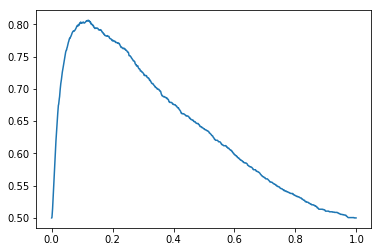

In [53]:
roc_auc_calc(val_pred)

Text(0.5, 0, 'Predicted probabilites')

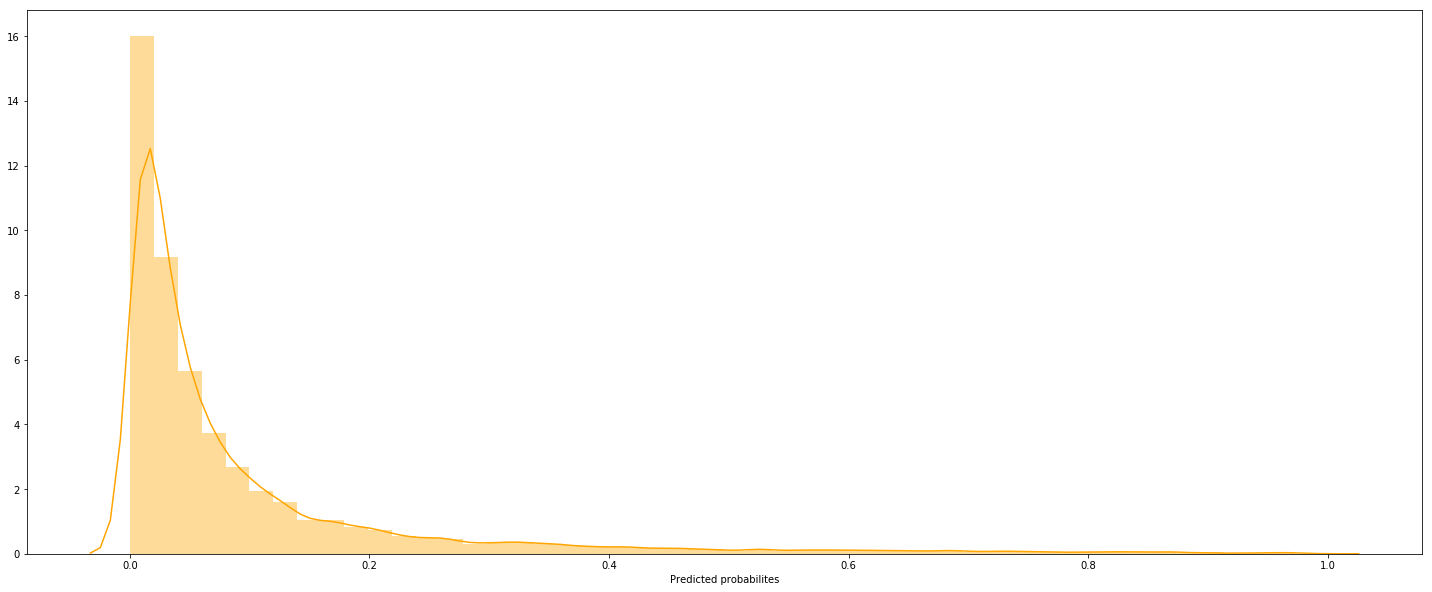

In [61]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(25,10))
sns.distplot(val_pred, color="Orange", ax=ax)
ax.set_xlabel("Predicted probabilites")
# sns.distplot(improved_proba_predictions.values[:,1], color="Purple", ax=ax[1])
# ax[1].set_xlabel("Predicted probabilites of {}".format(improved_proba_predictions.columns.values[1]))
# ax[1]

In [28]:
def roc_auc_calc(val_pred):
    rng = np.arange(0, 1, 0.001)
    f1s = np.zeros((rng.shape[0]))
    for j,t in enumerate(tqdm(rng)):
        p = np.array(val_pred>t, dtype=np.int8)
        scoref1 = roc_auc_score(y_val, p)
        f1s[j] = scoref1
    plt.plot(rng, f1s)
    T = rng[np.where(f1s == np.max(f1s))[0]]
    print('Probability threshold maximizing CV F1-score for each class:')
    print(T, np.max(f1s))
    return np.max(f1s)


In [64]:
predictions = model.predict(test, num_iteration=model.best_iteration)
predictions

array([0.07586302, 0.33569696, 0.2009416 , ..., 0.0065595 , 0.11886765,
       0.10326822])

In [65]:
res=pandas.DataFrame({'ID_code':list(ID_code),'target':predictions})

In [66]:
res.to_csv("answer_lgb_9leaves_earlystop.csv",index=False)

In [67]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f answer_lgb_9leaves_earlystop.csv -m " lgb 9 leaves  auc_roc_score 0.8064267237893271"

100%|███████████████████████████████████████| 6.04M/6.04M [00:09<00:00, 696kB/s]
Successfully submitted to Santander Customer Transaction Prediction